# Emotional anaysis of tweets (Subset)

In [1]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
import transformers
import torch
import seaborn as sns

In [2]:
df = pd.read_csv('/notebooks/evanc/KoReCOVID/resources/Pol5_Clean.csv').sample(5000)

In [3]:
df.head()

,Unnamed: 0,time,id,text,user,uid,mention_username,mention_id,mention_realname,url,...,user_listed_count,user_description,user_geo_enabled,user_verified,lang,rtb,mentioncheck,replycheck,month,week
146590,146590,2020-05-21 23:35:37+00:00,1263614456829022209,@dcexaminer @JoeBiden @realDonaldTrump This he...,ArmedInfidel_US,1472543887,dcexaminer JoeBiden realDonaldTrump realDonald...,18956073 939091 25073877 25073877,Washington Examiner Joe Biden Donald J. Trump ...,https://t.co/WmOTDfqLDF,...,4,"WARNING: If you are easily offended, you bette...",False,False,en,True,True,False,5,21
60869,60869,2020-05-17 17:57:50+00:00,1262079896785784834,@realDonaldTrump people are in a desperate sit...,MikeSireli,755950504627273728,realDonaldTrump,25073877,Donald J. Trump,https://t.co/OQmgBPrNQT,...,0,NaN,False,False,en,True,True,True,5,20
109100,109100,2020-05-20 15:40:54+00:00,1263132600480206849,@tedlieu @IAmJohnAles Ol Ted out here spitting...,Benjay_mann,911645740941942785,tedlieu IAmJohnAles,21059255 140586054,Ted Lieu John Ales*,https://t.co/OB8pEr7ZhB,...,0,"Sports, video games, fishing and a family man....",False,False,en,True,True,True,5,21
309242,309242,2020-05-31 07:17:07+00:00,1266992084638105601,@realDonaldTrump You are a pathetic excuse for...,AppalachianSpi2,1263887973625536519,realDonaldTrump,25073877,Donald J. Trump,https://t.co/GtBBHG5ax4,...,0,NaN,False,False,en,True,True,True,5,22
245739,245739,2020-05-26 06:33:24+00:00,1265169143835299849,@SexCounseling @brithume @realDonaldTrump Peop...,rustyisleaving,3383186015,SexCounseling brithume realDonaldTrump,204444440 112047805 25073877,"Dawn Michael, PhD💗 Brit Hume Donald J. Trump",NaN,...,24,NaN,True,False,en,True,True,False,5,22


In [4]:
df.shape

(5000, 31)

In [5]:
df = df.drop('Unnamed: 0', axis=1)

In [6]:
from transformers import pipeline

2022-04-16 20:31:26.501853: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-16 20:31:26.501917: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [7]:
# First we will classify based on specific emotions
classifier = pipeline('text-classification', model='bhadresh-savani/distilbert-base-uncased-emotion', return_all_scores=True)

In [8]:
df['Emotions'] = df['text'].apply(lambda tweet: classifier(tweet))

In [10]:
#Now we are going to find sentiments with bertweet
SentClassify = pipeline('text-classification', model='finiteautomata/bertweet-base-sentiment-analysis', return_all_scores=True)

In [12]:
#This may be less accurate as this is truncated to the old twitter length
df['Bert_Scents'] = df['text'].apply(lambda tweet: SentClassify(tweet[:127]))

In [13]:
#Next we will use VADER
import nltk

In [14]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [15]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

In [17]:
df['VADER_Scents'] = df['text'].apply(lambda tweet: sid.polarity_scores(tweet))

In [18]:
df.to_csv('/notebooks/evanc/KoReCOVID/resources/Pol5_Clean_Sample_Scores.csv')

In [34]:
df = df.reset_index()

In [35]:
df_sentiments = df[['id','Emotions','Bert_Scents','VADER_Scents']]

In [36]:
#Now that have sentiments for each tweet I am going to try to standardize this data and merge it back into the main dataframe
#This is so that I can do visualizations with relative ease
df_sentiments

,id,Emotions,Bert_Scents,VADER_Scents
0,1263614456829022209,"[[{'label': 'sadness', 'score': 0.029198400676...","[[{'label': 'NEG', 'score': 0.0016769989160820...","{'neg': 0.0, 'neu': 0.85, 'pos': 0.15, 'compou..."
1,1262079896785784834,"[[{'label': 'sadness', 'score': 0.117977239191...","[[{'label': 'NEG', 'score': 0.9805493950843811...","{'neg': 0.085, 'neu': 0.915, 'pos': 0.0, 'comp..."
2,1263132600480206849,"[[{'label': 'sadness', 'score': 0.000932891038...","[[{'label': 'NEG', 'score': 0.9853773713111877...","{'neg': 0.276, 'neu': 0.59, 'pos': 0.134, 'com..."
3,1266992084638105601,"[[{'label': 'sadness', 'score': 0.998848080635...","[[{'label': 'NEG', 'score': 0.9828436374664307...","{'neg': 0.216, 'neu': 0.647, 'pos': 0.137, 'co..."
4,1265169143835299849,"[[{'label': 'sadness', 'score': 0.193735733628...","[[{'label': 'NEG', 'score': 0.9717398881912231...","{'neg': 0.3, 'neu': 0.7, 'pos': 0.0, 'compound..."
...,...,...,...,...
4995,1262974259930038274,"[[{'label': 'sadness', 'score': 0.676169037818...","[[{'label': 'NEG', 'score': 0.0044236690737307...","{'neg': 0.215, 'neu': 0.754, 'pos': 0.031, 'co..."
4996,1261282692752044033,"[[{'label': 'sadness', 'score': 0.028182098641...","[[{'label': 'NEG', 'score': 0.8639341592788696...","{'neg': 0.202, 'neu': 0.798, 'pos': 0.0, 'comp..."
4997,1262855000411254785,"[[{'label': 'sadness', 'score': 0.019029801711...","[[{'label': 'NEG', 'score': 0.7460896372795105...","{'neg': 0.18, 'neu': 0.695, 'pos': 0.125, 'com..."
4998,1263725963034136576,"[[{'label': 'sadness', 'score': 0.998223602771...","[[{'label': 'NEG', 'score': 0.9808047413825989...","{'neg': 0.297, 'neu': 0.568, 'pos': 0.135, 'co..."


In [37]:
#First we are going to deal with the emotions since I'm not a huge fan of it's current format
df_sentiments['Emotions'][0] #Here I take a look at the data structure and we are going to change it to a simple dicitonary

[[{'label': 'sadness', 'score': 0.029198400676250458},
  {'label': 'joy', 'score': 0.8588876724243164},
  {'label': 'love', 'score': 0.0026735954452306032},
  {'label': 'anger', 'score': 0.07180817425251007},
  {'label': 'fear', 'score': 0.03617622330784798},
  {'label': 'surprise', 'score': 0.0012558656744658947}]]

In [ ]:
# I am going to make this data look like this {'emotion':(score)}}

In [40]:
df_sentiments['Emotions'][0][0][0]['label']

'sadness'

In [48]:
df_sentiments['Emotions'] = df_sentiments['Emotions'].apply(lambda scores: {i['label'] :i['score'] for i in scores[0]})

/tmp/ipykernel_24864/817669527.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sentiments['Emotions'] = df_sentiments['Emotions'].apply(lambda scores: {i['label'] :i['score'] for i in scores[0]})


In [53]:
#Now that I have the emotions in the right format I will start on the bert sentiment scores
df.Bert_Scents[0]

[[{'label': 'NEG', 'score': 0.0016769989160820842},
  {'label': 'NEU', 'score': 0.2576282024383545},
  {'label': 'POS', 'score': 0.7406948208808899}]]

In [57]:
df_sentiments['Bert_Scents'] = df_sentiments['Bert_Scents'].apply(lambda scores: {i['label'] :i['score'] for i in scores[0]})

/tmp/ipykernel_24864/2729609626.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sentiments['Bert_Scents'] = df_sentiments['Bert_Scents'].apply(lambda scores: {i['label'] :i['score'] for i in scores[0]})


In [65]:
df_sentiments['Bert_Scents'] = df_sentiments['Bert_Scents'].apply(lambda sents: {k.lower():v for k,v in sents.items()})

/tmp/ipykernel_24864/4024542694.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sentiments['Bert_Scents'] = df_sentiments['Bert_Scents'].apply(lambda sents: {k.lower():v for k,v in sents.items()})


In [66]:
#Now let's check the formatting of everything
df_sentiments.head()

,id,Emotions,Bert_Scents,VADER_Scents
0,1263614456829022209,"{'sadness': 0.029198400676250458, 'joy': 0.858...","{'neg': 0.0016769989160820842, 'neu': 0.257628...","{'neg': 0.0, 'neu': 0.85, 'pos': 0.15, 'compou..."
1,1262079896785784834,"{'sadness': 0.11797723919153214, 'joy': 0.0096...","{'neg': 0.9805493950843811, 'neu': 0.015814296...","{'neg': 0.085, 'neu': 0.915, 'pos': 0.0, 'comp..."
2,1263132600480206849,"{'sadness': 0.0009328910382464528, 'joy': 0.00...","{'neg': 0.9853773713111877, 'neu': 0.009474319...","{'neg': 0.276, 'neu': 0.59, 'pos': 0.134, 'com..."
3,1266992084638105601,"{'sadness': 0.9988480806350708, 'joy': 0.00025...","{'neg': 0.9828436374664307, 'neu': 0.013597691...","{'neg': 0.216, 'neu': 0.647, 'pos': 0.137, 'co..."
4,1265169143835299849,"{'sadness': 0.193735733628273, 'joy': 0.002407...","{'neg': 0.9717398881912231, 'neu': 0.025310093...","{'neg': 0.3, 'neu': 0.7, 'pos': 0.0, 'compound..."


In [67]:
#Now that everything is reletivly standard I am going to extract a string from each row that best represtents each way of
#detecting emotion

In [71]:
df_sentiments['Highest_Emotion'] = df_sentiments['Emotions'].apply(lambda emotions: max(emotions, key=emotions.get))
df_sentiments['Bert_Scents'] = df_sentiments['Bert_Scents'].apply(lambda scents: max(scents, key=scents.get))

/tmp/ipykernel_24864/1906636997.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sentiments['Highest_Emotion'] = df_sentiments['Emotions'].apply(lambda emotions: max(emotions, key=emotions.get))
/tmp/ipykernel_24864/1906636997.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sentiments['Bert_Scents'] = df_sentiments['Bert_Scents'].apply(lambda scents: max(scents, key=scents.get))


In [72]:
df_sentiments.head()

,id,Emotions,Bert_Scents,VADER_Scents,Highest_Emotion
0,1263614456829022209,"{'sadness': 0.029198400676250458, 'joy': 0.858...",pos,"{'neg': 0.0, 'neu': 0.85, 'pos': 0.15, 'compou...",joy
1,1262079896785784834,"{'sadness': 0.11797723919153214, 'joy': 0.0096...",neg,"{'neg': 0.085, 'neu': 0.915, 'pos': 0.0, 'comp...",fear
2,1263132600480206849,"{'sadness': 0.0009328910382464528, 'joy': 0.00...",neg,"{'neg': 0.276, 'neu': 0.59, 'pos': 0.134, 'com...",anger
3,1266992084638105601,"{'sadness': 0.9988480806350708, 'joy': 0.00025...",neg,"{'neg': 0.216, 'neu': 0.647, 'pos': 0.137, 'co...",sadness
4,1265169143835299849,"{'sadness': 0.193735733628273, 'joy': 0.002407...",neg,"{'neg': 0.3, 'neu': 0.7, 'pos': 0.0, 'compound...",fear


In [73]:
def Classify_Sentiment(score):
    if score >= 0.6:
        return 'pos'
    elif score <= 0.4: 
        return 'neg'
    else:
        return 'neu'

In [80]:
df_sentiments['VADER_Sents_Cat'] = df_sentiments['VADER_Scents'].apply(lambda x: Classify_Sentiment(x['compound']))

/tmp/ipykernel_24864/309123767.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sentiments['VADER_Sents_Cat'] = df_sentiments['VADER_Scents'].apply(lambda x: Classify_Sentiment(x['compound']))


In [81]:
df_sentiments.head()

,id,Emotions,Bert_Scents,VADER_Scents,Highest_Emotion,VADER_Sents_Cat
0,1263614456829022209,"{'sadness': 0.029198400676250458, 'joy': 0.858...",pos,"{'neg': 0.0, 'neu': 0.85, 'pos': 0.15, 'compou...",joy,neu
1,1262079896785784834,"{'sadness': 0.11797723919153214, 'joy': 0.0096...",neg,"{'neg': 0.085, 'neu': 0.915, 'pos': 0.0, 'comp...",fear,neg
2,1263132600480206849,"{'sadness': 0.0009328910382464528, 'joy': 0.00...",neg,"{'neg': 0.276, 'neu': 0.59, 'pos': 0.134, 'com...",anger,neg
3,1266992084638105601,"{'sadness': 0.9988480806350708, 'joy': 0.00025...",neg,"{'neg': 0.216, 'neu': 0.647, 'pos': 0.137, 'co...",sadness,neg
4,1265169143835299849,"{'sadness': 0.193735733628273, 'joy': 0.002407...",neg,"{'neg': 0.3, 'neu': 0.7, 'pos': 0.0, 'compound...",fear,neg


<AxesSubplot:title={'center':'Bar Plot of Catagorical Emotions for Each Tweet'}, xlabel='Highest_Emotion', ylabel='count'>

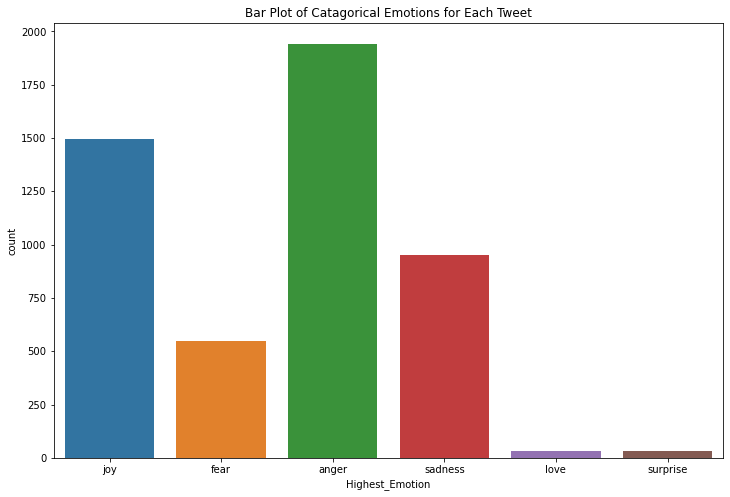

In [105]:
# Now that I have categorical variables for each of these metics I will make some bar charts
# 1) Emotions
plt.figure(figsize=(12,8))
plt.title('Bar Plot of Catagorical Emotions for Each Tweet')
sns.countplot(data=df_sentiments, x='Highest_Emotion')

<AxesSubplot:title={'center':'Bar Plot of Catagorical Bert Sentiments for Each Tweet'}, xlabel='Bert_Scents', ylabel='count'>

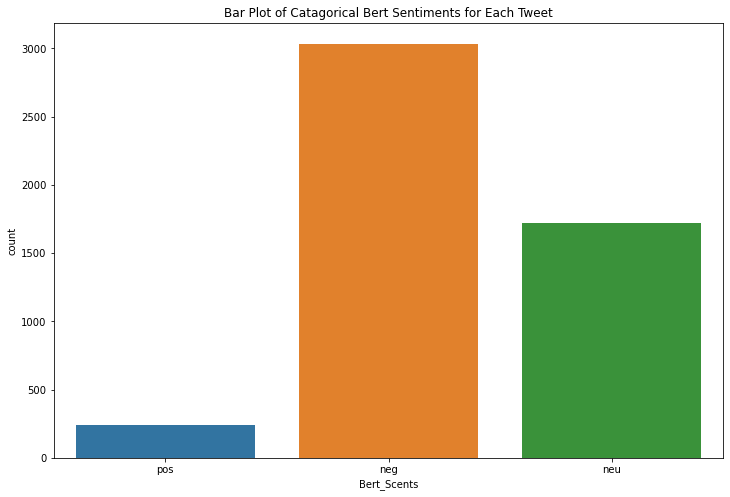

In [102]:
# 2) Bert Sentiments
plt.figure(figsize=(12,8))
plt.title('Bar Plot of Catagorical Bert Sentiments for Each Tweet')
sns.countplot(data=df_sentiments, x='Bert_Scents')

<AxesSubplot:title={'center':'Bar Plot of Catagorical VADER Sentiments for Each Tweet'}, xlabel='VADER_Sents_Cat', ylabel='count'>

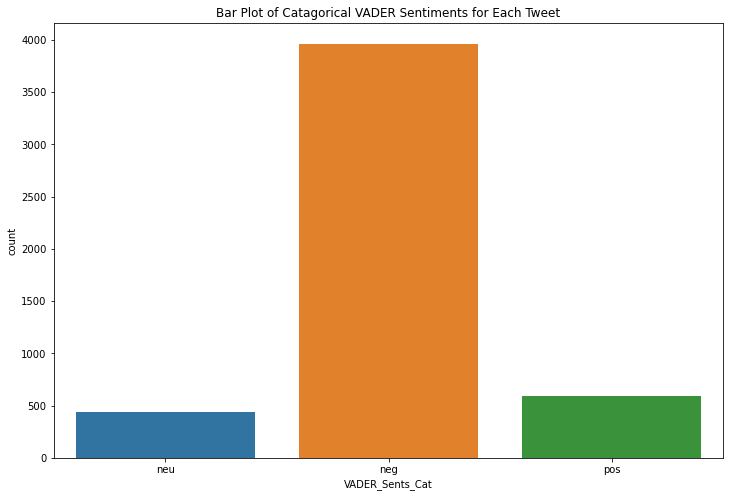

In [107]:
# 2) VADER Sentiments
plt.figure(figsize=(12,8))
plt.title('Bar Plot of Catagorical VADER Sentiments for Each Tweet')
sns.countplot(data=df_sentiments, x='VADER_Sents_Cat')

In [115]:
df = df.merge(df_sentiments, on='id')

In [117]:
df.to_csv('/notebooks/evanc/KoReCOVID/resources/SampleWithEmotionsPol5.csv')